In [1]:
import tensorflow as tf

In [66]:
resnet = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=False, weights='imagenet', pooling = 'avg')

219062272/219055592 [==============================] - 18s 0us/step


In [67]:
resnet

In [68]:
num_class = 6

In [69]:
model = tf.keras.Sequential([resnet,
                    tf.keras.layers.Dense(num_class, activation='softmax')])

In [70]:
model.layers[0].trainable = False

In [71]:
lr = 0.01
momentum = 0.001
opt = tf.keras.optimizers.SGD(learning_rate=lr, momentum = momentum)

model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, 1536)              54336736  
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 9222      
Total params: 54,345,958
Trainable params: 9,222
Non-trainable params: 54,336,736
_________________________________________________________________


In [72]:
data_path = "C:\\Users\\Nikesh\\Downloads\\dataset-resized"

In [73]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_resnet_v2.preprocess_input)

In [74]:
img_shape = 299
train_gen = data_generator.flow_from_directory(data_path + '/train',
                                               target_size=(img_shape, img_shape),
                                               batch_size=85,
                                               class_mode='categorical')

val_gen = data_generator.flow_from_directory(data_path + '/val',
                                             target_size=(img_shape, img_shape),
                                             batch_size=1,
                                             class_mode='categorical',
                                             shuffle=False)

Found 1892 images belonging to 6 classes.
Found 252 images belonging to 6 classes.


In [122]:
n_epoch = 10

model_name = 'recycler2'
checkpoint = tf.keras.callbacks.ModelCheckpoint('./' +  model_name + '.h5',
                             monitor='val_loss',
                             save_best_only=True,
                             verbose=1)

history = model.fit_generator(train_gen,
                              steps_per_epoch=train_gen.samples/train_gen.batch_size,
                              validation_data=val_gen,
                              validation_steps=val_gen.samples/val_gen.batch_size,
                              epochs=n_epoch,
                              callbacks=[checkpoint])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 22.258823529411764 steps, validate for 252.0 steps
Epoch 1/10
22/22 [============================>.] - ETA: 0s - loss: 0.5072 - accuracy: 0.8423
Epoch 00001: val_loss improved from inf to 0.69805, saving model to ./recycler2.h5
23/22 [==============================] - 43s 2s/step - loss: 0.5067 - accuracy: 0.8399 - val_loss: 0.6981 - val_accuracy: 0.7500
Epoch 2/10
22/22 [============================>.] - ETA: 0s - loss: 0.5005 - accuracy: 0.8401
Epoch 00002: val_loss did not improve from 0.69805
23/22 [==============================] - 42s 2s/step - loss: 0.5046 - accuracy: 0.8383 - val_loss: 0.7065 - val_accuracy: 0.7421
Epoch 3/10
22/22 [============================>.] - ETA: 0s - loss: 0.5000 - accuracy: 0.8423
Epoch 00003: val_loss did not improve from 0.69805
23/22 [==============================] - 42s 2s/step - loss: 0.5018 - accuracy: 0.8420 - val_loss: 0.7007 - val_accuracy: 0.7579
Epoch 4/10
22/22 [=================

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [123]:
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
loss = history.history['loss']

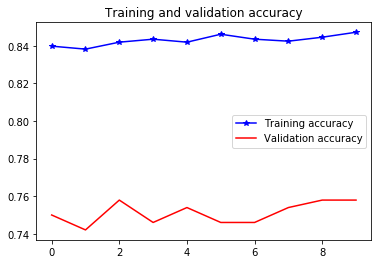

In [124]:
plt.plot(range(n_epoch), acc, 'b*-', label = 'Training accuracy')
plt.plot(range(n_epoch), val_acc, 'r', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

In [126]:
test_gen = data_generator.flow_from_directory(data_path + '/test',
                                              target_size=(img_shape, img_shape),
                                              batch_size=1,
                                              class_mode='categorical',
                                              shuffle=False)

Found 383 images belonging to 6 classes.


In [127]:
eval_model = model

In [128]:
y_pred = eval_model.predict(test_gen)
y_pred = np.argmax(y_pred, axis=1)

In [132]:
import collections
collections.Counter(y_pred)

Counter({0: 56, 5: 38, 3: 83, 1: 76, 4: 79, 2: 51})

In [130]:
from sklearn.metrics import classification_report, confusion_matrix

In [133]:
print(classification_report(test_gen.labels, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94        61
           1       0.82      0.82      0.82        76
           2       0.92      0.76      0.83        62
           3       0.94      0.87      0.90        90
           4       0.77      0.84      0.80        73
           5       0.50      0.90      0.64        21

    accuracy                           0.84       383
   macro avg       0.82      0.85      0.82       383
weighted avg       0.86      0.84      0.85       383



array([[55,  0,  0,  5,  0,  1],
       [ 0, 62,  1,  0, 13,  0],
       [ 0,  6, 47,  0,  4,  5],
       [ 1,  1,  0, 78,  1,  9],
       [ 0,  6,  2,  0, 61,  4],
       [ 0,  1,  1,  0,  0, 19]], dtype=int64)

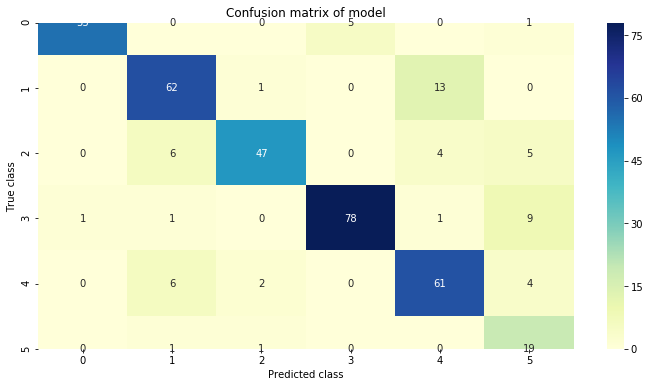

In [134]:
cf_matrix = confusion_matrix(test_gen.labels, y_pred)

plt.figure(figsize=(12,6))
heatmap = sns.heatmap(cf_matrix, annot=True, fmt='d', color='blue', cmap="YlGnBu")
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix of model')
cf_matrix

In [22]:
import os

In [24]:
img_dir = "C:\\Users\\Nikesh\\Desktop\\test"

In [1]:
test_gen2 = data_generator.flow_from_directory(img_dir,
                                              target_size=(img_shape, img_shape),
                                              class_mode='categorical',
                                              shuffle=False)

NameError: name 'data_generator' is not defined

In [2]:
result= model.predict(test_gen2)
result = np.argmax(result,axis = 1)
print(collections.Counter(result))
labels = (test_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
fig = plt.figure(figsize=(20, 20))
x,y = test_gen2.next()
n = 19
for i in range(0,n):
    plt.figure(figsize=(2, 2))
    image_x = x[i,:,:,2]
    image_label = labels[result[i]] # only OK if shuffle=false
    plt.title(image_label)
    plt.imshow(image_x)
    plt.show() 
    


NameError: name 'model' is not defined